___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Tensorflow Project 
Let's wrap up this Deep Learning by taking a a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [1]:
import pandas as pd

In [2]:
bank_data = pd.read_csv('bank_note_data.csv')

** Check the head of the Data **

In [3]:
bank_data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

In [4]:
import seaborn as sns
%matplotlib inline

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

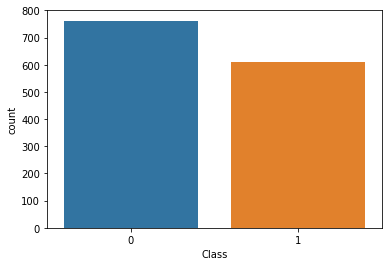

In [5]:
sns.countplot(x='Class', data=bank_data)

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

/home/hackerman/anaconda2/envs/MachineLearning/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/hackerman/anaconda2/envs/MachineLearning/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/hackerman/anaconda2/envs/MachineLearning/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/hackerman/anaconda2/envs/MachineLearning/lib/python2.7/site-packages/statsmodels/nonparametric/kd

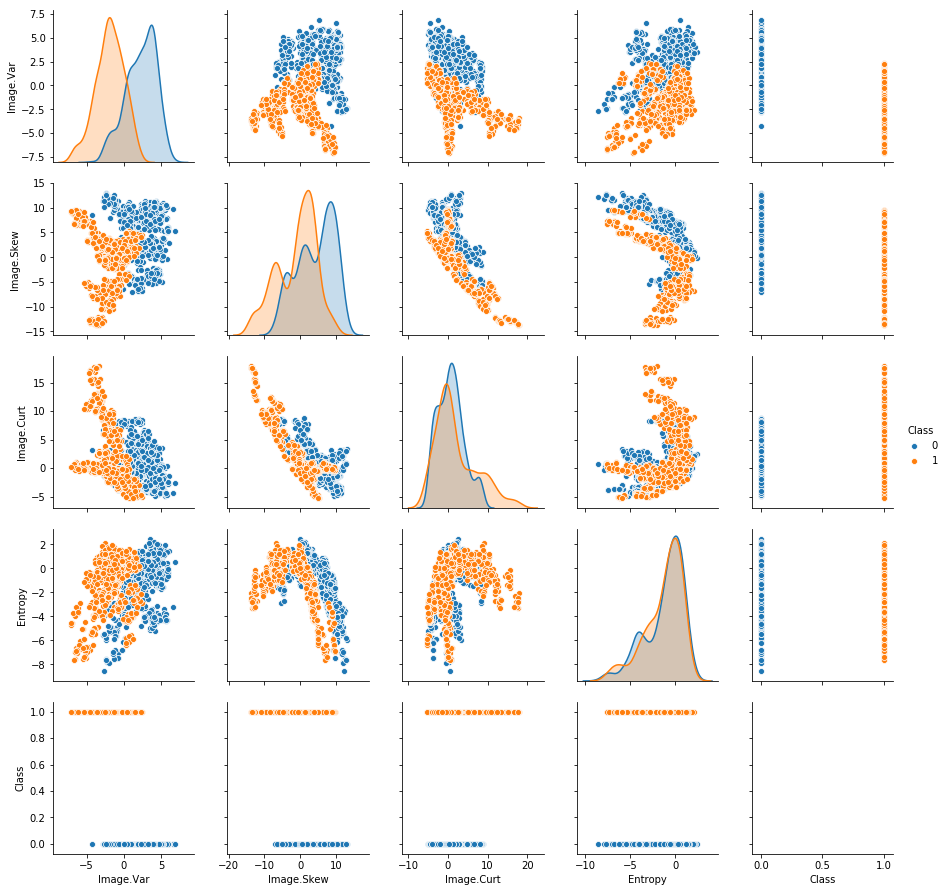

In [6]:
sns.pairplot(data=bank_data, hue='Class')

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling

** Import StandardScaler() from SciKit Learn**

In [7]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [8]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [9]:
scaler.fit(bank_data.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [10]:
scaled_features = scaler.fit_transform(bank_data.drop('Class',axis=1))

In [11]:
type(scaled_features)

numpy.ndarray

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [12]:
df_scaled_features = pd.DataFrame(scaled_features,columns=bank_data.columns[:-1]) #only features
df_scaled_features.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [13]:
X = df_scaled_features
y = bank_data['Class']

** Use the .as_matrix() method on X and Y and reset them equal to this result. We need to do this in order for TensorFlow to accept the data in Numpy array form instead of a pandas series. **

In [14]:
# Tensorflow only accepts numpy arrays (not pandas series)
X = X.as_matrix()
y = y.as_matrix()

/home/hackerman/anaconda2/envs/MachineLearning/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/hackerman/anaconda2/envs/MachineLearning/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


** Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Contrib.learn

** Import tensorflow.contrib.learn.python.learn as learn**

In [17]:
import tensorflow as tf
tf.VERSION

'1.12.0'

In [18]:
# Tensorflow works in either Python 2.7 OR Python 3.6 (not 3.7)
#import tensorflow.contrib.learn.python.learn as learn
import tensorflow.contrib.learn as learn 
#(https://stackoverflow.com/questions/47723759/module-tensorflow-contrib-learn-has-no-attribute-python)


** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [19]:
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=1)]
classifier = learn.DNNClassifier(feature_columns=feature_columns, hidden_units=[10,20,10], n_classes=2)
#classifier = learn.DNNClassifier(hidden_units=[10, 20, 10], n_classes=2)
# have to include feature_columns argument:
# https://stackoverflow.com/questions/46037627/tensorflow-contrib-learn-dnnclassifier-missing-1-required-positional-argument

Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_train_distribute': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f95f8bcac90>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_protocol': None, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_model_dir': '/tmp/tmpWFqBQW', '_tf_random_seed': None, '_master': '', '_device_fn': None, '_num_worker_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_evaluation_master': '', '_eval_d

** Now fit classifier to the training data. Use steps=200 with a batch_size of 20. You can play around with these values if you want!**

*Note: Ignore any warnings you get, they won't effect your output*

In [20]:
classifier.fit(X_train, y_train, steps=200, batch_size=20)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to the Estimator interface.
Instructions for up

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x7f95fe2c3ed0>, 'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=1, default_value=None, dtype=tf.float32, normalizer=None),), 'embedding_lr_multipliers': None, 'optimizer': None, 'dropout': None, 'gradient_clip_norm': None, 'activation_fn': <function relu at 0x7f96013aa230>, 'input_layer_min_slice_size': None})

## Model Evaluation

** Use the predict method from the classifier model to create predictions from X_test **

In [21]:
classifier_predictions = classifier.predict(X_test)
#note_predictions = classifier.predict(X_test)

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpWFqBQW/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [22]:
type(classifier_predictions)

generator

In [23]:
print(classifier_predictions)

<generator object <genexpr> at 0x7f95f8ba7e60>


** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
#print(classification_report(y_test,list(classifier_predictions)))

In [26]:
print(confusion_matrix(y_test, list(classifier_predictions)))
# HAVE TO CONVERT GENERATOR TO LIST:
# https://stackoverflow.com/questions/24130745/convert-generator-object-to-list-for-debugging

[[219   2]
 [  0 191]]


## Optional Comparison

** You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

** It should have also done very well, but not quite as good as the DNN model. Hopefully you have seen the power of DNN! **

# Great Job!